## Read Metro File and Extract Time Series ##

In [2]:
import datetime as dt
import pandas as pd

In [3]:
all_data = pd.read_csv('/home/sallen/MEOPAR/Metro_Data/UBC Output.xlsx-2023-7-31 15.19.6.csv', 
                       low_memory=False, parse_dates=[11])

In [4]:
all_data.keys()

Index(['LIMS Product', 'Lab Name', 'LIMS Project', 'Project Name', 'Job ID',
       'Lab ID', 'Sample Name', 'Sampling Point', 'Sampling Point Description',
       'Matrix', 'Sample Type', 'Sampled Date', 'Received Date',
       'Extraction Date', 'Analysis Date', 'Report Date', 'Test Type',
       'Method', 'Order Number', 'New Analysis', 'Class', 'Subclass',
       'Analyte', 'LIMS Analysis Code', 'Result', 'DL', 'Units', 'Qualifier',
       'Qualifier Description', 'Sampled By'],
      dtype='object')

In [5]:
all_data = all_data.set_index('Sampled Date')

In [17]:
temp_data = all_data.loc[all_data['LIMS Analysis Code']=='TEMP']

In [26]:
temp_data['Result'] = pd.to_numeric(temp_data.Result)

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


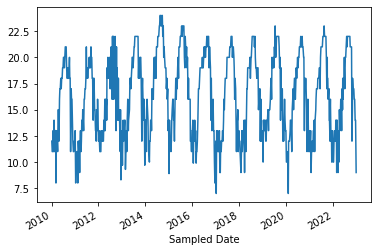

In [28]:
temp_data['Result'].plot();

In [42]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2022, 1, 31)
mask = (temp_data.index > start_date) & (temp_data.index <= end_date)

#Select the sub-DataFrame:

temp_data.loc[mask].Result.mean()


11.25

In [43]:
mask = (temp_data.index.month == 1)

#Select the sub-DataFrame:

temp_data.loc[mask].Result.mean()

11.61864406779661

In [14]:
sil_data = all_data.loc[all_data['Analyte']=='Silicon Dissolved']

In [21]:
sil_data['Result'] = pd.to_numeric(sil_data.Result)

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Sampled Date'>

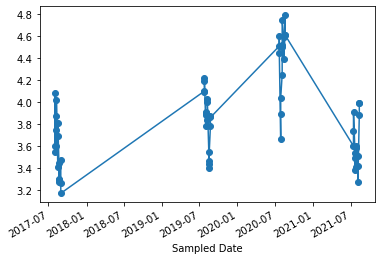

In [24]:
sil_data.Result.plot(marker='o')

In [25]:
sil_data.Result.mean()

3.8577611940298504

In [28]:
sil_data['Units']

Sampled Date
2017-08-01 07:50:00    mg/L
2017-08-01 08:55:00    mg/L
2017-08-01 09:45:00    mg/L
2017-08-08 07:45:00    mg/L
2017-08-08 08:45:00    mg/L
                       ... 
2021-08-05 12:00:00    mg/L
2021-08-05 12:30:00    mg/L
2021-08-12 09:15:00    mg/L
2021-08-12 09:45:00    mg/L
2021-08-12 10:15:00    mg/L
Name: Units, Length: 67, dtype: object

In [29]:
approx_Si = 3.86 * 1000/28.0855

In [30]:
approx_Si

137.43746773245982

In [31]:
TSS_data = all_data.loc[all_data['Analyte']=='Total Suspended Solids']

In [34]:
TSS_data['Result'] = pd.to_numeric(TSS_data.Result, errors = 'coerce')

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Sampled Date'>

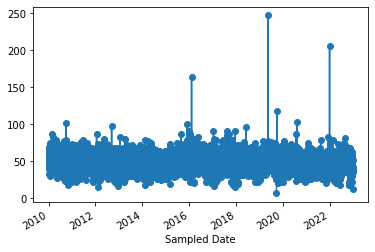

In [35]:
TSS_data.Result.plot(marker='o')

In [36]:
TSS_data.Result.mean()

50.989692307692344

In [37]:
TSS_data['Units']

Sampled Date
NaT                    mg/L
2010-01-01 00:00:00    mg/L
2010-01-02 00:00:00    mg/L
2010-01-03 00:00:00    mg/L
2010-01-04 00:00:00    mg/L
                       ... 
2022-12-27 00:00:00    mg/L
2022-12-28 00:00:00    mg/L
2022-12-28 08:00:00    mg/L
2022-12-30 00:00:00    mg/L
2022-12-31 00:00:00    mg/L
Name: Units, Length: 6501, dtype: object

https://enpc.hal.science/hal-00722662/document 
TSS = 0.89 * T + 7 with T in FAU  (note that FAU and NTU are sort of the same but measured in different ways).

In [40]:
turb_approx = (TSS_data.Result.mean() - 7)/0.89
turb_approx

49.42662057044083